In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Load the dataset
df = pd.read_csv('Sample - Superstore.csv', encoding='latin-1')
df.to_excel('superstore_data.xlsx', index=False)  # Save as Excel for reference
df = pd.read_excel('superstore_data.xlsx')

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Dataset Overview:
Shape: (9994, 21)

Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [3]:
print("Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

Data Types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Basic Statistics:
 

In [4]:
# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create time-based columns
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
df['Weekday'] = df['Order Date'].dt.dayofweek
df['Days_to_Ship'] = (df['Ship Date'] - df['Order Date']).dt.days

# Create profit margin column
df['Profit_Margin'] = df['Profit'] / df['Sales']

# Create discount tiers
df['Discount_Tier'] = pd.cut(df['Discount'], 
                            bins=[0, 0.1, 0.3, 0.5, 1.0], 
                            labels=['Low (0-10%)', 'Medium (10-30%)', 'High (30-50%)', 'Very High (50%+)'],
                            include_lowest=True)

print("Data preprocessing completed!")
print(f"Date range: {df['Order Date'].min()} to {df['Order Date'].max()}")

Data preprocessing completed!
Date range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00


In [5]:
print("=== KEY BUSINESS METRICS ===")
print(f"Total Sales: ${df['Sales'].sum():,.2f}")
print(f"Total Profit: ${df['Profit'].sum():,.2f}")
print(f"Average Order Value: ${df['Sales'].mean():,.2f}")
print(f"Profit Margin: {(df['Profit'].sum() / df['Sales'].sum() * 100):.2f}%")
print(f"Total Orders: {df['Order ID'].nunique():,}")
print(f"Total Customers: {df['Customer ID'].nunique():,}")
print(f"Total Products: {df['Product ID'].nunique():,}")
print(f"Average Days to Ship: {df['Days_to_Ship'].mean():.1f} days")

=== KEY BUSINESS METRICS ===
Total Sales: $2,297,200.86
Total Profit: $286,397.02
Average Order Value: $229.86
Profit Margin: 12.47%
Total Orders: 5,009
Total Customers: 793
Total Products: 1,862
Average Days to Ship: 4.0 days


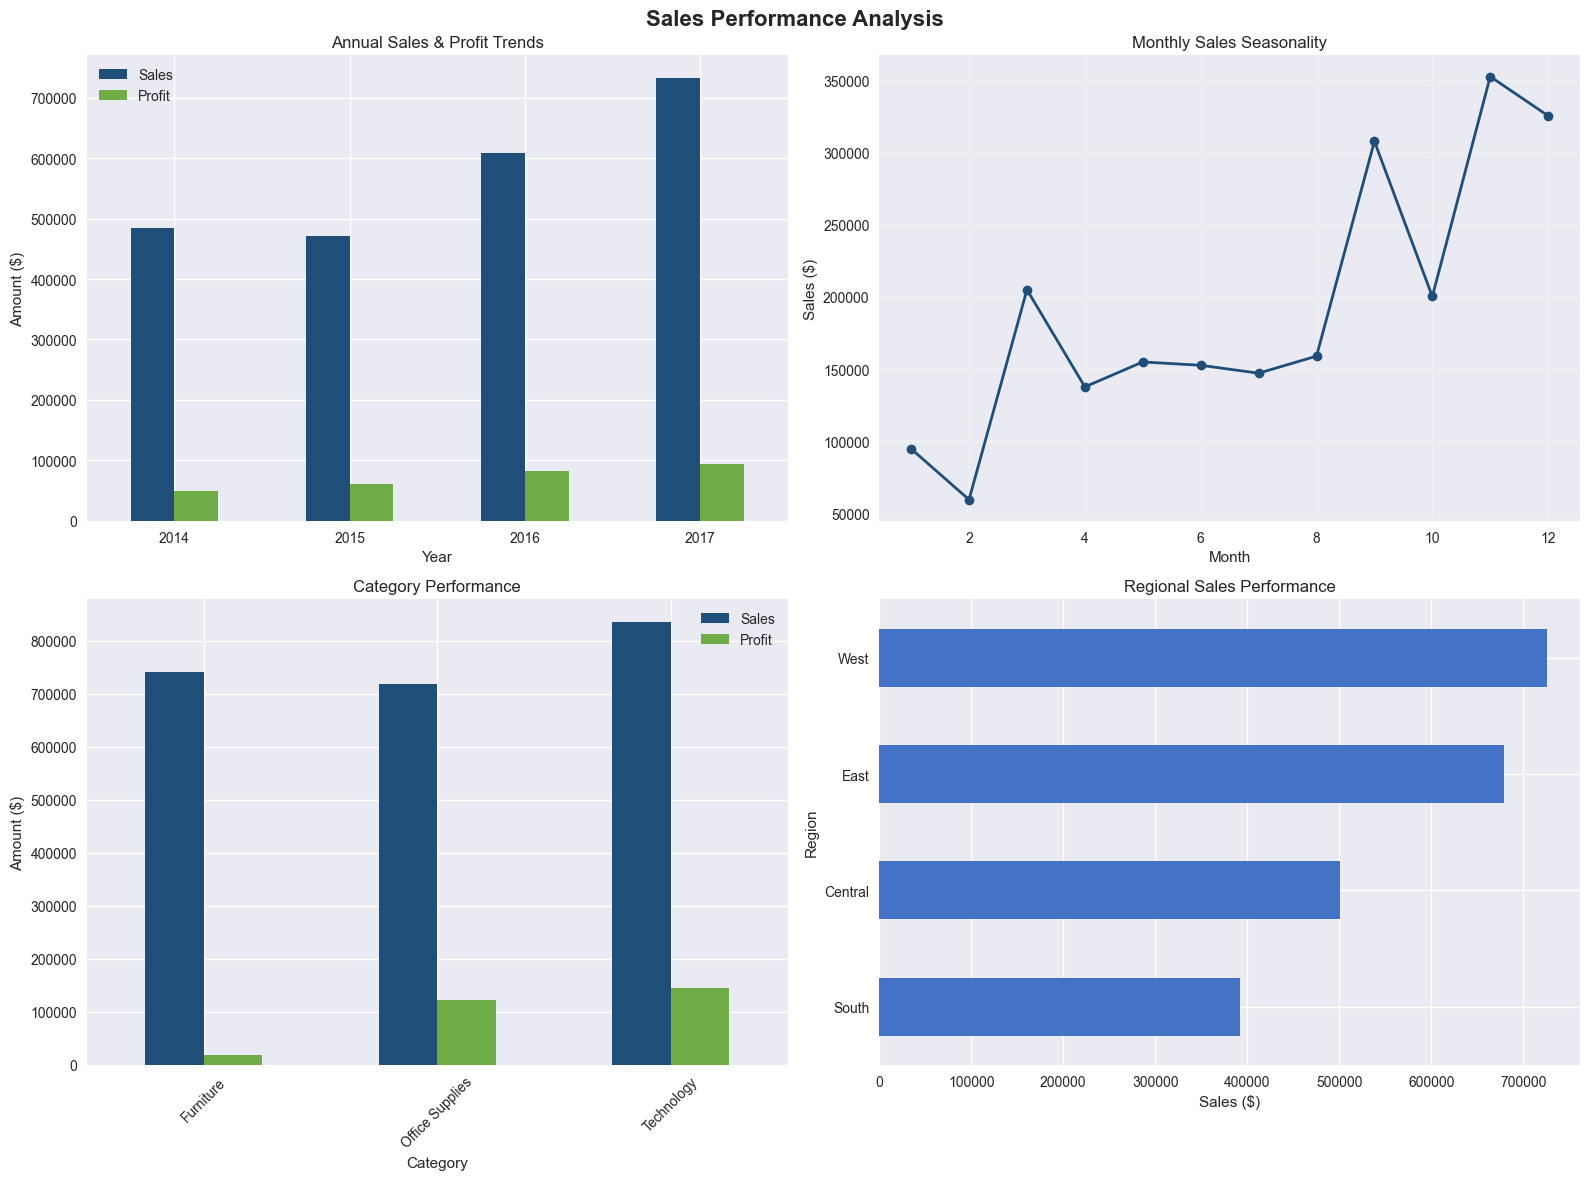

In [6]:
# Create visualizations for sales performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Sales Performance Analysis', fontsize=16, fontweight='bold')

# 1. Yearly trends
yearly_trends = df.groupby('Year')[['Sales', 'Profit']].sum()
yearly_trends.plot(kind='bar', ax=axes[0,0], color=['#1f4e79', '#70ad47'])
axes[0,0].set_title('Annual Sales & Profit Trends')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Amount ($)')
axes[0,0].legend(['Sales', 'Profit'])
axes[0,0].tick_params(axis='x', rotation=0)

# 2. Monthly seasonality
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', ax=axes[0,1], marker='o', color='#1f4e79', linewidth=2)
axes[0,1].set_title('Monthly Sales Seasonality')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Sales ($)')
axes[0,1].grid(True, alpha=0.3)

# 3. Category performance
category_perf = df.groupby('Category')[['Sales', 'Profit']].sum()
category_perf.plot(kind='bar', ax=axes[1,0], color=['#1f4e79', '#70ad47'])
axes[1,0].set_title('Category Performance')
axes[1,0].set_xlabel('Category')
axes[1,0].set_ylabel('Amount ($)')
axes[1,0].legend(['Sales', 'Profit'])
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Regional performance
regional_perf = df.groupby('Region')['Sales'].sum().sort_values(ascending=True)
regional_perf.plot(kind='barh', ax=axes[1,1], color='#4472c4')
axes[1,1].set_title('Regional Sales Performance')
axes[1,1].set_xlabel('Sales ($)')
axes[1,1].set_ylabel('Region')

plt.tight_layout()
plt.show()

In [7]:
print("=== TOP PERFORMERS ===")
print("\nTop 5 Categories by Sales:")
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(top_categories)

print("\nTop 10 Sub-Categories by Profit:")
top_subcategories = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
print(top_subcategories)

print("\nTop 10 States by Sales:")
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_states)

=== TOP PERFORMERS ===

Top 5 Categories by Sales:
Category
Technology        836154.03
Furniture         741999.80
Office Supplies   719047.03
Name: Sales, dtype: float64

Top 10 Sub-Categories by Profit:
Sub-Category
Copiers       55617.82
Phones        44515.73
Accessories   41936.64
Paper         34053.57
Binders       30221.76
Chairs        26590.17
Storage       21278.83
Appliances    18138.01
Furnishings   13059.14
Envelopes      6964.18
Name: Profit, dtype: float64

Top 10 States by Sales:
State
California     457687.63
New York       310876.27
Texas          170188.05
Washington     138641.27
Pennsylvania   116511.91
Florida         89473.71
Illinois        80166.10
Ohio            78258.14
Michigan        76269.61
Virginia        70636.72
Name: Sales, dtype: float64


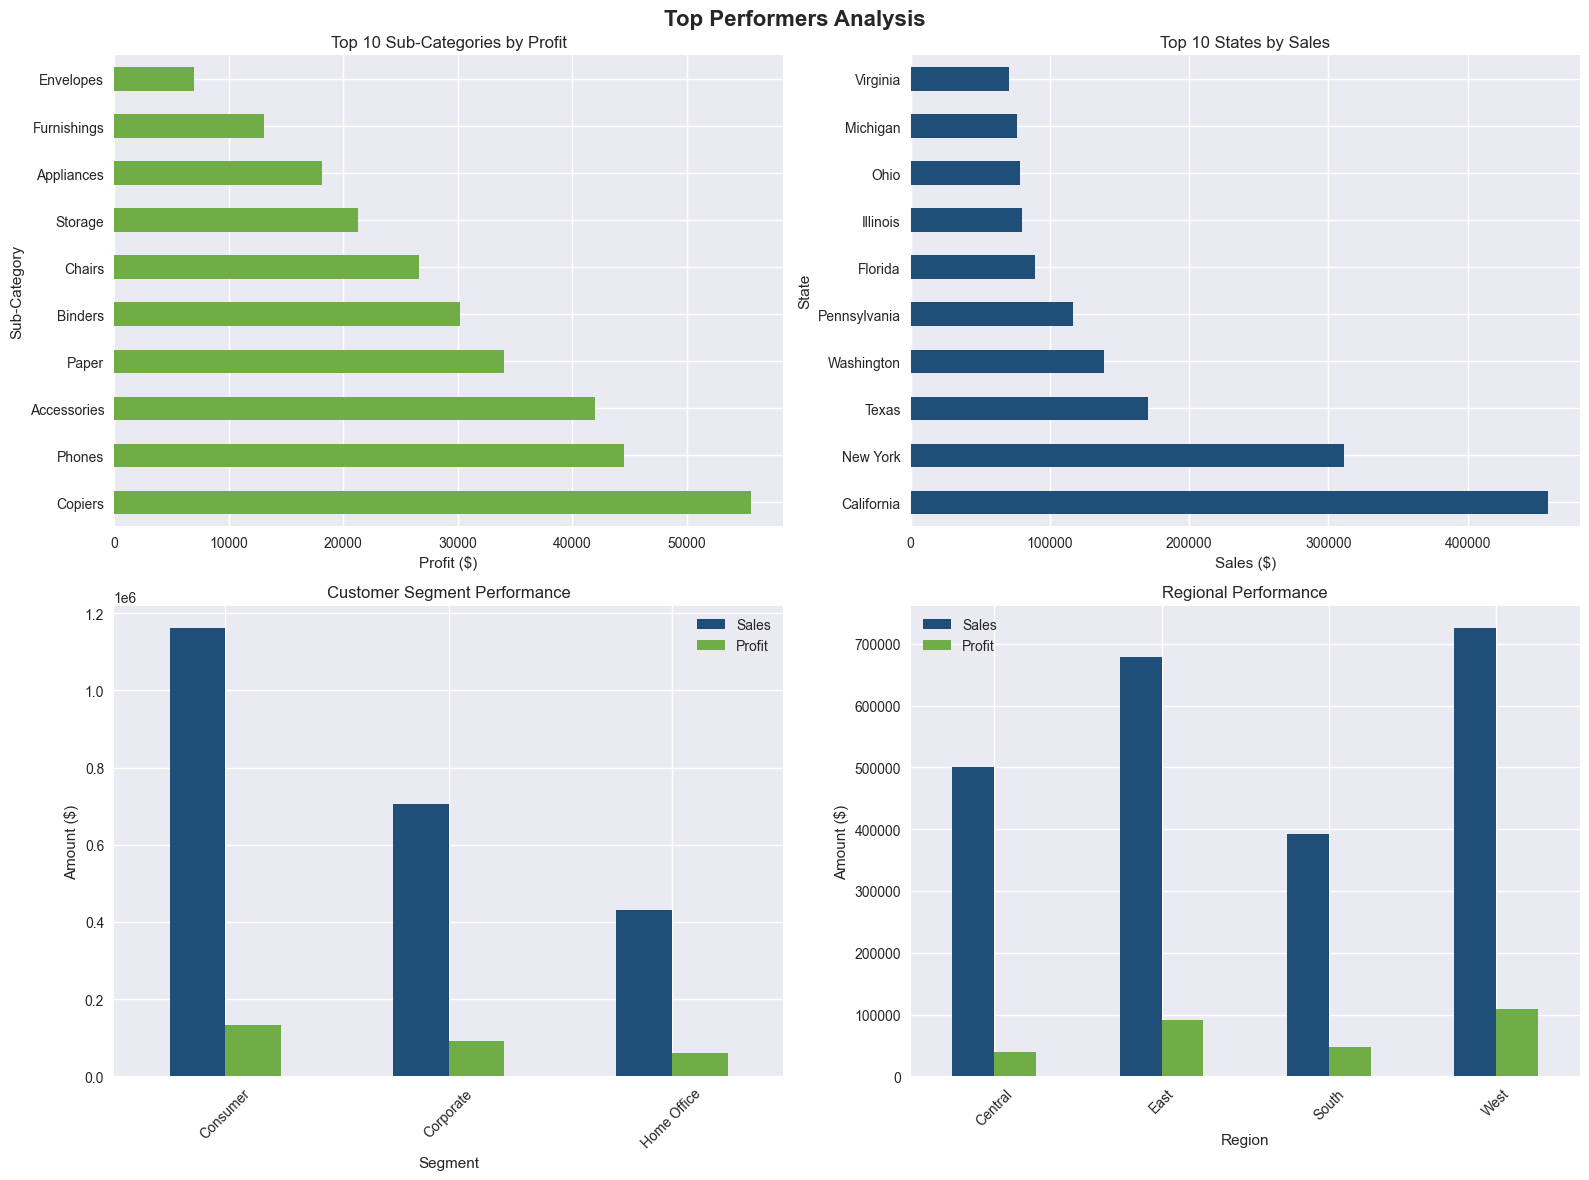

In [8]:
# Visualize top performers
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Top Performers Analysis', fontsize=16, fontweight='bold')

# Top sub-categories by profit
top_subcategories.plot(kind='barh', ax=axes[0,0], color='#70ad47')
axes[0,0].set_title('Top 10 Sub-Categories by Profit')
axes[0,0].set_xlabel('Profit ($)')

# Top states by sales
top_states.plot(kind='barh', ax=axes[0,1], color='#1f4e79')
axes[0,1].set_title('Top 10 States by Sales')
axes[0,1].set_xlabel('Sales ($)')

# Customer segments
segment_perf = df.groupby('Segment')[['Sales', 'Profit']].sum()
segment_perf.plot(kind='bar', ax=axes[1,0], color=['#1f4e79', '#70ad47'])
axes[1,0].set_title('Customer Segment Performance')
axes[1,0].set_ylabel('Amount ($)')
axes[1,0].legend(['Sales', 'Profit'])
axes[1,0].tick_params(axis='x', rotation=45)

# Regional performance
regional_perf = df.groupby('Region')[['Sales', 'Profit']].sum()
regional_perf.plot(kind='bar', ax=axes[1,1], color=['#1f4e79', '#70ad47'])
axes[1,1].set_title('Regional Performance')
axes[1,1].set_ylabel('Amount ($)')
axes[1,1].legend(['Sales', 'Profit'])
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [9]:
print("=== PROBLEM AREAS ===")
print("\nTop 5 Loss-Making Sub-Categories:")
loss_subcategories = df.groupby('Sub-Category')['Profit'].sum().sort_values().head()
print(loss_subcategories)

print("\nTop 10 Loss-Making Products:")
loss_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)
print(loss_products)

print("\nWorst Performing Regions by Profit Margin:")
region_margins = df.groupby('Region').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum() * 100))
print(region_margins.sort_values())

=== PROBLEM AREAS ===

Top 5 Loss-Making Sub-Categories:
Sub-Category
Tables      -17725.48
Bookcases    -3472.56
Supplies     -1189.10
Fasteners      949.52
Machines      3384.76
Name: Profit, dtype: float64

Top 10 Loss-Making Products:
Product Name
Cubify CubeX 3D Printer Double Head Print                           -8879.97
Lexmark MX611dhe Monochrome Laser Printer                           -4589.97
Cubify CubeX 3D Printer Triple Head Print                           -3839.99
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases            -2876.12
Bush Advantage Collection Racetrack Conference Table                -1934.40
GBC DocuBind P400 Electric Binding System                           -1878.17
Cisco TelePresence System EX90 Videoconferencing Unit               -1811.08
Martin Yale Chadless Opener Electric Letter Opener                  -1299.18
Balt Solid Wood Round Tables                                        -1201.06
BoxOffice By Design Rectangular and Half-Moon Meeting R

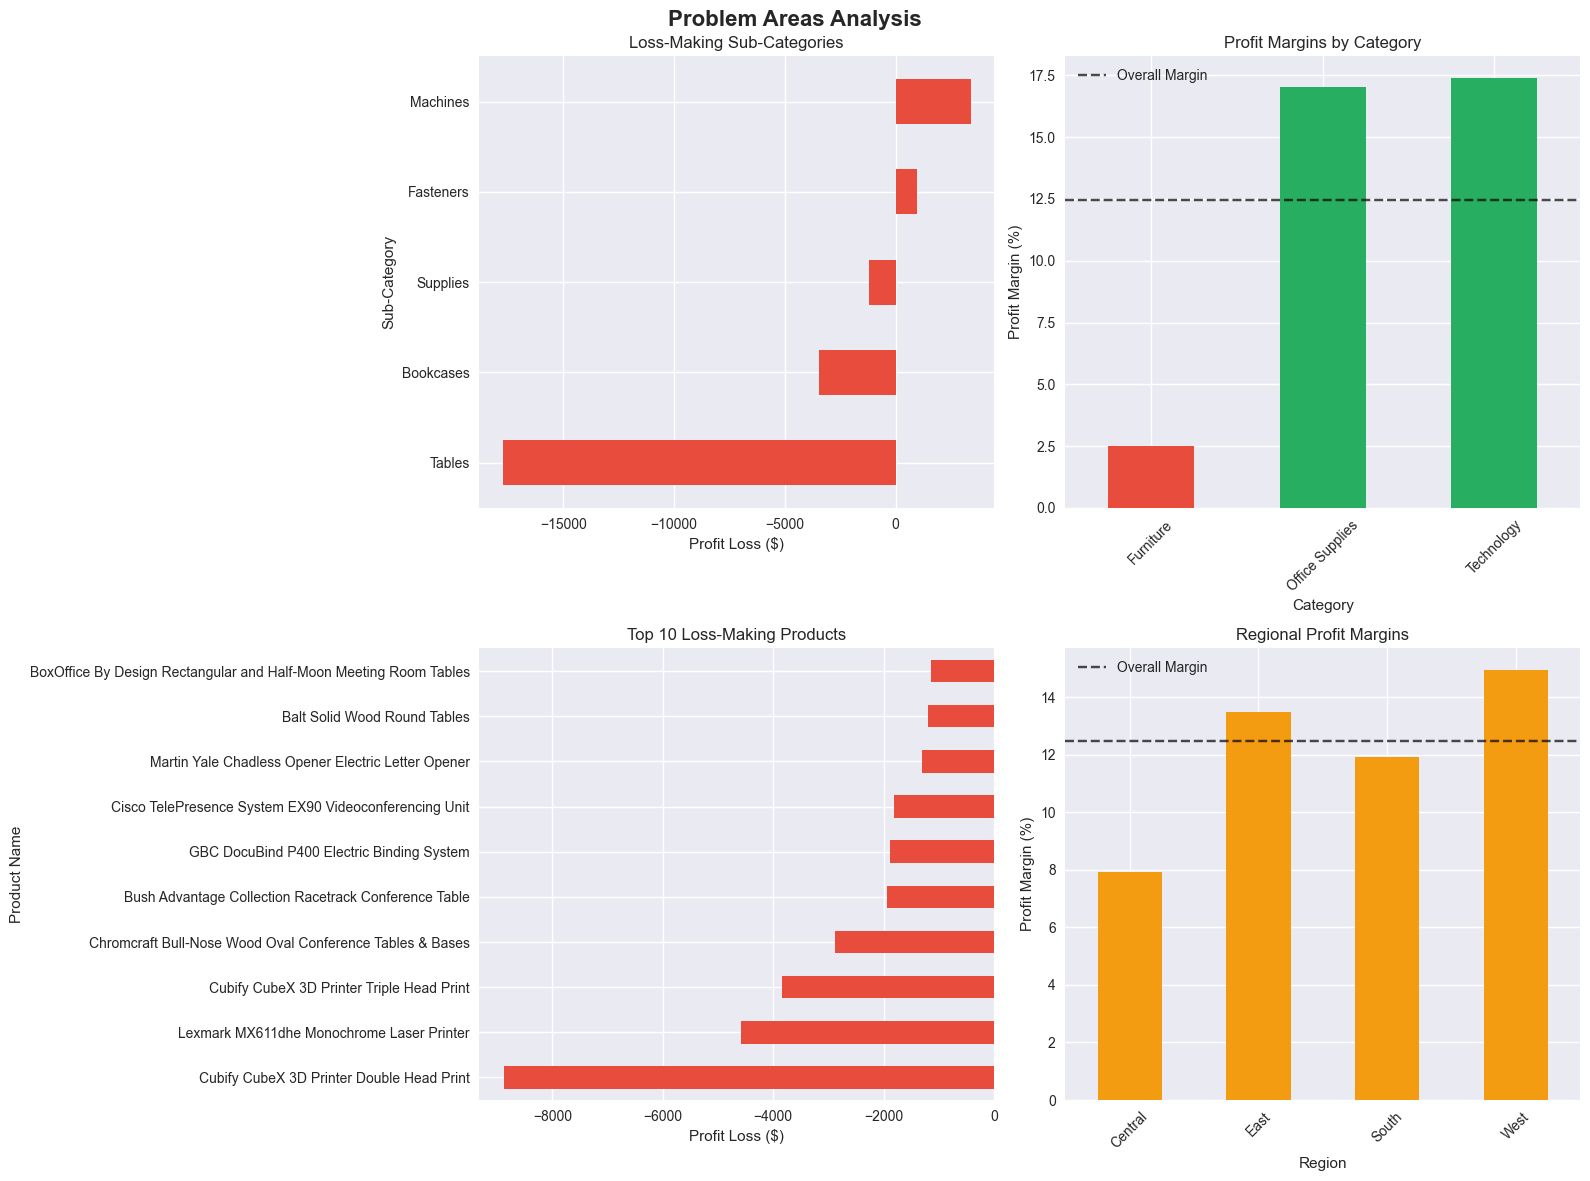

In [10]:
# Visualize problem areas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Problem Areas Analysis', fontsize=16, fontweight='bold')

# Loss-making sub-categories
loss_subcategories.plot(kind='barh', ax=axes[0,0], color='#e74c3c')
axes[0,0].set_title('Loss-Making Sub-Categories')
axes[0,0].set_xlabel('Profit Loss ($)')

# Profit margins by category
category_margins = df.groupby('Category').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum() * 100))
colors = ['#e74c3c' if x < 10 else '#f39c12' if x < 15 else '#27ae60' for x in category_margins]
category_margins.plot(kind='bar', ax=axes[0,1], color=colors)
axes[0,1].set_title('Profit Margins by Category')
axes[0,1].set_ylabel('Profit Margin (%)')
axes[0,1].axhline(y=12.47, color='black', linestyle='--', alpha=0.7, label='Overall Margin')
axes[0,1].legend()
axes[0,1].tick_params(axis='x', rotation=45)

# Loss-making products (top 10)
loss_products.plot(kind='barh', ax=axes[1,0], color='#e74c3c')
axes[1,0].set_title('Top 10 Loss-Making Products')
axes[1,0].set_xlabel('Profit Loss ($)')

# Regional profit margins
region_margins.plot(kind='bar', ax=axes[1,1], color='#f39c12')
axes[1,1].set_title('Regional Profit Margins')
axes[1,1].set_ylabel('Profit Margin (%)')
axes[1,1].axhline(y=12.47, color='black', linestyle='--', alpha=0.7, label='Overall Margin')
axes[1,1].legend()
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [11]:
print("=== TEMPORAL INSIGHTS ===")
print("\nYearly Trends:")
yearly_trends = df.groupby('Year')[['Sales', 'Profit']].sum()
print(yearly_trends)

print("\nGrowth Rates:")
sales_growth = yearly_trends['Sales'].pct_change() * 100
profit_growth = yearly_trends['Profit'].pct_change() * 100
growth_df = pd.DataFrame({'Sales Growth (%)': sales_growth, 'Profit Growth (%)': profit_growth})
print(growth_df.dropna())

print("\nMonthly Seasonality (Sales):")
monthly_sales = df.groupby('Month')['Sales'].sum()
print(monthly_sales)

print("\nQuarterly Performance:")
quarterly_perf = df.groupby('Quarter')[['Sales', 'Profit']].sum()
print(quarterly_perf)

=== TEMPORAL INSIGHTS ===

Yearly Trends:
         Sales   Profit
Year                   
2014 484247.50 49543.97
2015 470532.51 61618.60
2016 609205.60 81795.17
2017 733215.26 93439.27

Growth Rates:
      Sales Growth (%)  Profit Growth (%)
Year                                     
2015             -2.83              24.37
2016             29.47              32.74
2017             20.36              14.24

Monthly Seasonality (Sales):
Month
1     94924.84
2     59751.25
3    205005.49
4    137762.13
5    155028.81
6    152718.68
7    147238.10
8    159044.06
9    307649.95
10   200322.98
11   352461.07
12   325293.50
Name: Sales, dtype: float64

Quarterly Performance:
            Sales    Profit
Quarter                    
1       359681.58  48023.74
2       445509.62  55284.54
3       613932.11  72467.08
4       878077.56 110621.66


In [14]:
print("=== PROFIT MARGINS ===")

segment_margins = df.groupby('Segment').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum() * 100))
print("\nProfit Margins by Segment:")
print(segment_margins)

category_margins = df.groupby('Category').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum() * 100))
print("\nProfit Margins by Category:")
print(category_margins)

# Detailed margin analysis
print("\nDetailed Margin Analysis:")
margin_summary = df.groupby(['Category', 'Segment']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
})
margin_summary['Profit_Margin_%'] = (margin_summary['Profit'] / margin_summary['Sales'] * 100)
print(margin_summary.round(2))

=== PROFIT MARGINS ===

Profit Margins by Segment:
Segment
Consumer      11.55
Corporate     13.03
Home Office   14.03
dtype: float64

Profit Margins by Category:
Category
Furniture          2.49
Office Supplies   17.04
Technology        17.40
dtype: float64

Detailed Margin Analysis:
                                Sales   Profit  Quantity  Profit_Margin_%
Category        Segment                                                  
Furniture       Consumer    391049.31  6991.08      4166             1.79
                Corporate   229019.79  7584.82      2495             3.31
                Home Office 121930.70  3875.38      1367             3.18
Office Supplies Consumer    363952.14 56330.32     11758            15.48
                Corporate   230676.46 40227.32      7018            17.44
                Home Office 124418.43 25933.16      4130            20.84
Technology      Consumer    406399.90 70797.81      3597            17.42
                Corporate   246450.12 44167.00  

In [15]:
print("=== DISCOUNT ANALYSIS ===")

# Discount impact on profit
discount_impact = df.groupby('Discount_Tier', observed=False)['Profit'].agg(['mean', 'sum', 'count'])
print("\nAverage Profit by Discount Level:")
print(discount_impact)

# Detailed discount analysis
print("\nDiscount Statistics:")
print(f"Average Discount: {df['Discount'].mean()*100:.2f}%")
print(f"Median Discount: {df['Discount'].median()*100:.2f}%")
print(f"Orders with No Discount: {(df['Discount'] == 0).sum():,} ({(df['Discount'] == 0).mean()*100:.1f}%)")
print(f"Orders with High Discount (>30%): {(df['Discount'] > 0.3).sum():,} ({(df['Discount'] > 0.3).mean()*100:.1f}%)")

# Correlation between discount and profit
correlation = df['Discount'].corr(df['Profit'])
print(f"\nCorrelation between Discount and Profit: {correlation:.3f}")

=== DISCOUNT ANALYSIS ===

Average Profit by Discount Level:
                    mean       sum  count
Discount_Tier                            
Low (0-10%)        67.46 330016.78   4892
Medium (10-30%)    20.68  81387.02   3936
High (30-50%)    -156.28 -48447.73    310
Very High (50%+)  -89.44 -76559.05    856

Discount Statistics:
Average Discount: 15.62%
Median Discount: 20.00%
Orders with No Discount: 4,798 (48.0%)
Orders with High Discount (>30%): 1,166 (11.7%)

Correlation between Discount and Profit: -0.219


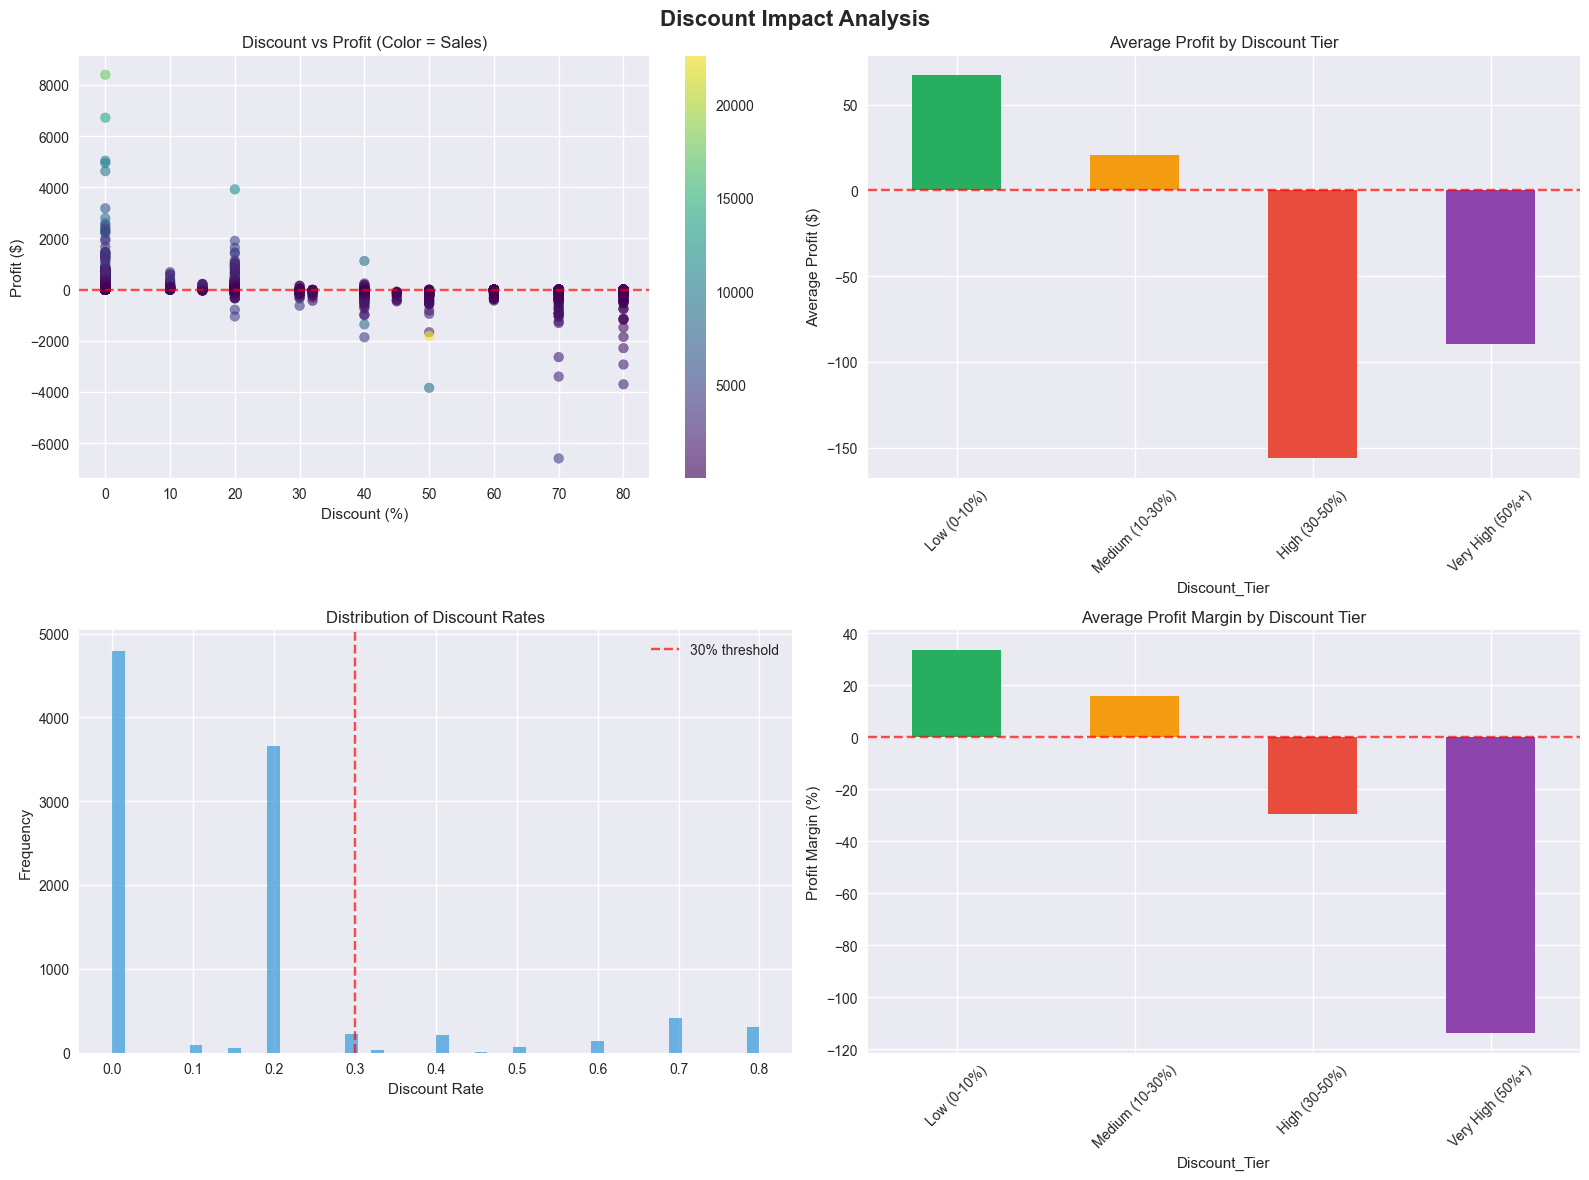

In [16]:
# Visualize discount impact
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Discount Impact Analysis', fontsize=16, fontweight='bold')

# Discount vs Profit scatter plot
scatter = axes[0,0].scatter(df['Discount']*100, df['Profit'], alpha=0.6, c=df['Sales'], cmap='viridis')
axes[0,0].set_xlabel('Discount (%)')
axes[0,0].set_ylabel('Profit ($)')
axes[0,0].set_title('Discount vs Profit (Color = Sales)')
axes[0,0].axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.colorbar(scatter, ax=axes[0,0])

# Average profit by discount tier
discount_impact['mean'].plot(kind='bar', ax=axes[0,1], color=['#27ae60', '#f39c12', '#e74c3c', '#8e44ad'])
axes[0,1].set_title('Average Profit by Discount Tier')
axes[0,1].set_ylabel('Average Profit ($)')
axes[0,1].axhline(y=0, color='red', linestyle='--', alpha=0.7)
axes[0,1].tick_params(axis='x', rotation=45)

# Discount distribution
df['Discount'].hist(bins=50, ax=axes[1,0], color='#3498db', alpha=0.7)
axes[1,0].set_xlabel('Discount Rate')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Discount Rates')
axes[1,0].axvline(x=0.3, color='red', linestyle='--', alpha=0.7, label='30% threshold')
axes[1,0].legend()

# Profit margin by discount tier
margin_by_discount = df.groupby('Discount_Tier', observed=False)['Profit_Margin'].mean() * 100
margin_by_discount.plot(kind='bar', ax=axes[1,1], color=['#27ae60', '#f39c12', '#e74c3c', '#8e44ad'])
axes[1,1].set_title('Average Profit Margin by Discount Tier')
axes[1,1].set_ylabel('Profit Margin (%)')
axes[1,1].axhline(y=0, color='red', linestyle='--', alpha=0.7)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [17]:
# Customer analysis
print("=== CUSTOMER INSIGHTS ===")
customer_metrics = df.groupby('Customer ID').agg({
    'Sales': ['sum', 'count'],
    'Profit': 'sum',
    'Order Date': ['min', 'max']
})
customer_metrics.columns = ['Total_Sales', 'Total_Orders', 'Total_Profit', 'First_Order', 'Last_Order']
customer_metrics['Customer_Lifetime_Days'] = (customer_metrics['Last_Order'] - customer_metrics['First_Order']).dt.days
customer_metrics['Avg_Order_Value'] = customer_metrics['Total_Sales'] / customer_metrics['Total_Orders']

print(f"Total Customers: {len(customer_metrics):,}")
print(f"Average Orders per Customer: {customer_metrics['Total_Orders'].mean():.2f}")
print(f"Average Customer Lifetime Value: ${customer_metrics['Total_Sales'].mean():,.2f}")
print(f"Top 10% Customers Account for: {(customer_metrics['Total_Sales'].nlargest(int(len(customer_metrics)*0.1)).sum() / customer_metrics['Total_Sales'].sum() * 100):.1f}% of Sales")

# Product analysis
print("\n=== PRODUCT INSIGHTS ===")
product_metrics = df.groupby('Product Name').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Order ID': 'nunique'
})
product_metrics['Profit_Margin'] = product_metrics['Profit'] / product_metrics['Sales']
product_metrics = product_metrics.sort_values('Profit', ascending=False)

print(f"Total Products: {len(product_metrics):,}")
print(f"Profitable Products: {(product_metrics['Profit'] > 0).sum():,} ({(product_metrics['Profit'] > 0).mean()*100:.1f}%)")
print(f"Loss-making Products: {(product_metrics['Profit'] < 0).sum():,} ({(product_metrics['Profit'] < 0).mean()*100:.1f}%)")

print("\nTop 5 Most Profitable Products:")
print(product_metrics.head()[['Sales', 'Profit', 'Profit_Margin']].round(2))

=== CUSTOMER INSIGHTS ===
Total Customers: 793
Average Orders per Customer: 12.60
Average Customer Lifetime Value: $2,896.85
Top 10% Customers Account for: 30.6% of Sales

=== PRODUCT INSIGHTS ===
Total Products: 1,850
Profitable Products: 1,546 (83.6%)
Loss-making Products: 301 (16.3%)

Top 5 Most Profitable Products:
                                                      Sales   Profit  \
Product Name                                                           
Canon imageCLASS 2200 Advanced Copier              61599.82 25199.93   
Fellowes PB500 Electric Punch Plastic Comb Bind... 27453.38  7753.04   
Hewlett Packard LaserJet 3310 Copier               18839.69  6983.88   
Canon PC1060 Personal Laser Copier                 11619.83  4570.93   
HP Designjet T520 Inkjet Large Format Printer -... 18374.90  4094.98   

                                                    Profit_Margin  
Product Name                                                       
Canon imageCLASS 2200 Advanced Copier 

In [22]:
print("\n" + "="*60)
print("                 KEY BUSINESS INSIGHTS SUMMARY")
print("="*60)

print("\n OVERALL PERFORMANCE:")
print(f"   • Total Revenue: ${df['Sales'].sum():,.0f}")
print(f"   • Total Profit: ${df['Profit'].sum():,.0f}")
print(f"   • Profit Margin: {(df['Profit'].sum() / df['Sales'].sum() * 100):.2f}%")
print(f"   • Annual Growth: {((yearly_trends.loc[2017, 'Sales'] / yearly_trends.loc[2014, 'Sales']) ** (1/3) - 1) * 100:.1f}% CAGR")

print("\n TOP PERFORMERS:")
print(f"   • Best Category: Technology ({category_margins.max():.1f}% margin)")
print(f"   • Best Region: West (${regional_perf.loc['West']} sales)")
print(f"   • Best Segment: Home Office ({segment_margins.max():.1f}% margin)")
print(f"   • Peak Season: Q4 (${quarterly_perf.loc[4, 'Sales']:,.0f} sales)")

print("\n CRITICAL ISSUES:")
print(f"   • Furniture Margin: Only {category_margins.min():.1f}% (vs {category_margins.mean():.1f}% average)")
print(f"   • High Discounts: {(df['Discount'] > 0.3).sum():,} orders with >30% discount = losses")
print(f"   • Worst Sub-category: Tables (${loss_subcategories.iloc[0]:,.0f} loss)")
print(f"   • Product Issues: {(product_metrics['Profit'] < 0).sum():,} loss-making products")

print("\n GROWTH OPPORTUNITIES:")
print(f"   • Technology Expansion: Replicate success in underperforming regions")
print(f"   • Discount Optimization: Limit to <30% could save ~${(df[df['Discount'] > 0.3]['Profit'] * -1).sum():,.0f}")
print(f"   • Home Office Focus: Highest margin segment with growth potential")
print(f"   • Seasonal Planning: Q4 represents 30% of annual revenue")

print("\n RECOMMENDED ACTIONS:")
print("   1. IMMEDIATE: Cap discounts at 25% maximum")
print("   2. SHORT-TERM: Review furniture pricing and supplier contracts")
print("   3. MEDIUM-TERM: Expand Technology products to Central/South regions")
print("   4. LONG-TERM: Optimize product portfolio based on profitability analysis")

print("\n POTENTIAL IMPACT:")
print(f"   • Discount reform could improve margins by 2-3 percentage points")
print(f"   • Regional optimization could add ${(regional_perf.max() - regional_perf.min()) * 0.5}+ in sales")
print(f"   • Product portfolio optimization could eliminate ${abs(loss_subcategories.sum()):,.0f} in losses")

print("\n" + "="*60)


                 KEY BUSINESS INSIGHTS SUMMARY

 OVERALL PERFORMANCE:
   • Total Revenue: $2,297,201
   • Total Profit: $286,397
   • Profit Margin: 12.47%
   • Annual Growth: 14.8% CAGR

 TOP PERFORMERS:
   • Best Category: Technology (17.4% margin)
   • Best Region: West ($Sales    725457.82
Profit   108418.45
Name: West, dtype: float64 sales)
   • Best Segment: Home Office (14.0% margin)
   • Peak Season: Q4 ($878,078 sales)

 CRITICAL ISSUES:
   • Furniture Margin: Only 2.5% (vs 12.3% average)
   • High Discounts: 1,166 orders with >30% discount = losses
   • Worst Sub-category: Tables ($-17,725 loss)
   • Product Issues: 301 loss-making products

 GROWTH OPPORTUNITIES:
   • Technology Expansion: Replicate success in underperforming regions
   • Discount Optimization: Limit to <30% could save ~$125,007
   • Home Office Focus: Highest margin segment with growth potential
   • Seasonal Planning: Q4 represents 30% of annual revenue

 RECOMMENDED ACTIONS:
   1. IMMEDIATE: Cap discount

In [23]:
# Create summary tables for Power BI
summary_tables = {
    'yearly_summary': yearly_trends,
    'monthly_summary': df.groupby('Month')[['Sales', 'Profit', 'Quantity']].sum(),
    'category_summary': df.groupby('Category')[['Sales', 'Profit', 'Quantity']].sum(),
    'region_summary': df.groupby('Region')[['Sales', 'Profit', 'Quantity']].sum(),
    'segment_summary': df.groupby('Segment')[['Sales', 'Profit', 'Quantity']].sum(),
    'subcategory_summary': df.groupby('Sub-Category')[['Sales', 'Profit', 'Quantity']].sum(),
    'state_summary': df.groupby('State')[['Sales', 'Profit', 'Quantity']].sum(),
    'discount_summary': df.groupby('Discount_Tier', observed=False)[['Sales', 'Profit', 'Quantity']].agg(['sum', 'mean', 'count'])
}

# Export to Excel with multiple sheets
with pd.ExcelWriter('superstore_power_bi_data.xlsx', engine='openpyxl') as writer:
    # Main dataset
    df.to_excel(writer, sheet_name='Raw_Data', index=False)
    
    # Summary tables
    for name, table in summary_tables.items():
        table.to_excel(writer, sheet_name=name.replace('_summary', '').title())
    
    # Top/Bottom performers
    product_metrics.head(20).to_excel(writer, sheet_name='Top_Products')
    product_metrics.tail(20).to_excel(writer, sheet_name='Bottom_Products')
    customer_metrics.nlargest(50, 'Total_Sales').to_excel(writer, sheet_name='Top_Customers')

print("Data exported successfully to 'superstore_power_bi_data.xlsx'")
print("Ready for Power BI import and visualization!")

# Display final data info
print(f"\nFinal dataset shape: {df.shape}")
print(f"Date range: {df['Order Date'].min().strftime('%Y-%m-%d')} to {df['Order Date'].max().strftime('%Y-%m-%d')}")
print(f"Total transactions: {len(df):,}")
print(f"Unique products: {df['Product Name'].nunique():,}")
print(f"Unique customers: {df['Customer ID'].nunique():,}")

Data exported successfully to 'superstore_power_bi_data.xlsx'
Ready for Power BI import and visualization!

Final dataset shape: (9994, 28)
Date range: 2014-01-03 to 2017-12-30
Total transactions: 9,994
Unique products: 1,850
Unique customers: 793
